In [1]:
from tensorflow import keras
from tensorflow.keras.layers import (
    Input,Conv2D, Dense, MaxPooling2D, AveragePooling2D, ReLU,  Flatten
)
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(train_images,train_labels),(test_images,test_labels)=keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


3


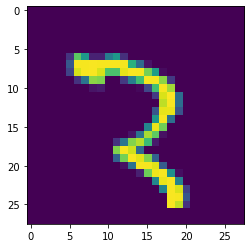

In [3]:
idx=500
plt.imshow(train_images[idx])
print(train_labels[idx])

In [4]:
input= Input(shape=(28,28,1)) #Input layer
hidden = Conv2D(64,(3,3), strides=(1, 1))(input)
hidden = ReLU()(hidden)
hidden = MaxPooling2D(pool_size=(2, 2))(hidden)
hidden = Conv2D(32,(3,3), strides=(1, 1))(hidden)
hidden = ReLU()(hidden)
hidden = AveragePooling2D(pool_size=(2, 2))(hidden)
hidden = Flatten()(hidden)
output = Dense(10, activation='softmax')(hidden)
model2 = Model(inputs=(input), outputs=output)

In [7]:
model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
re_lu (ReLU)                 (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
re_lu_1 (ReLU)               (None, 11, 11, 32)        0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 32)          0     

In [10]:
opt = keras.optimizers.Adam(learning_rate=0.01)
EPOCHS=5
BATCH_SIZE=64
model2.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
H=model2.fit(x=train_images,y=train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_images,test_labels))

Epoch 1/5
938/938 [==============================] - 60s 63ms/step - loss: 0.1033 - accuracy: 0.9699 - val_loss: 0.1134 - val_accuracy: 0.9677
Epoch 2/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0956 - accuracy: 0.9713 - val_loss: 0.1126 - val_accuracy: 0.9667
Epoch 3/5
938/938 [==============================] - 59s 63ms/step - loss: 0.1001 - accuracy: 0.9701 - val_loss: 0.1196 - val_accuracy: 0.9621
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.1015 - accuracy: 0.9700 - val_loss: 0.1038 - val_accuracy: 0.9673
Epoch 5/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0970 - accuracy: 0.9708 - val_loss: 0.1286 - val_accuracy: 0.9665


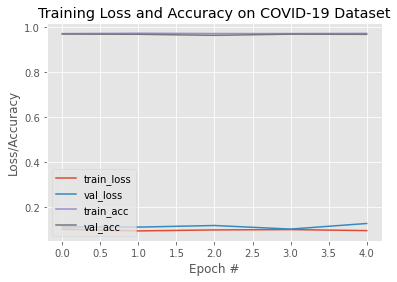

In [11]:
N = EPOCHS
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, N), H.history['loss'], label='train_loss')
plt.plot(np.arange(0, N), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, N), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0, N), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy on COVID-19 Dataset')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend(loc='lower left')